In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sb 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# 1. Variable threshold, binary classification

In [2]:
#alco_lv=6
alco_lv=input("Enter the quality value to define 'good' wine:")

Enter the quality value to define 'good' wine: 6


In [3]:
alco_lv=int(alco_lv)
data=pd.read_csv("winequality-white.csv", delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
judge=[] # judge for good & bad wine, good means quality > line 2 and judge will = 1 for good wine
for row in range(len(data)):
    if data['quality'][row] > alco_lv:
        judge.append(1)
    else:
        judge.append(0)

new_data = {'judge': judge}
data = data.assign(**new_data) # merge judge to the dataframe

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,judge
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### Data Visualization

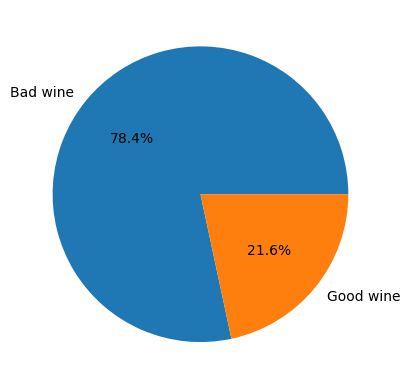

In [6]:
ver_labels = 'Bad wine','Good wine'
verdict = [data['judge'].value_counts()[0], data['judge'].value_counts()[1]]

fig, ax = plt.subplots()
ax.pie(verdict, labels=ver_labels, autopct='%1.1f%%')
plt.savefig('pie_bad_good_wine.png')
plt.show()

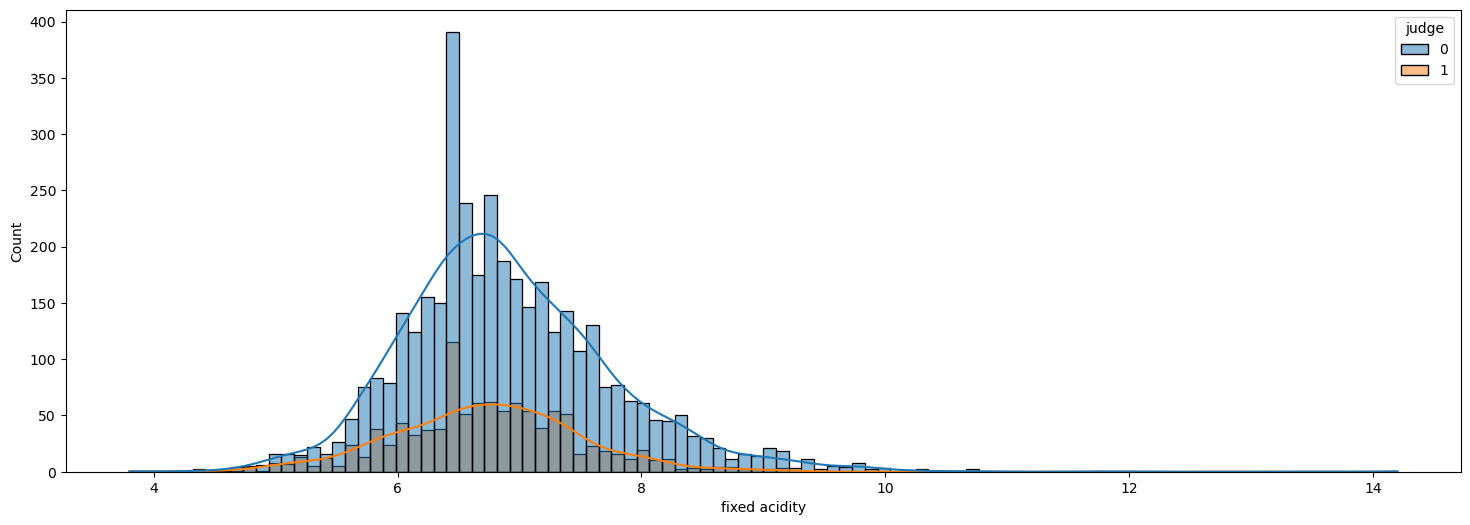

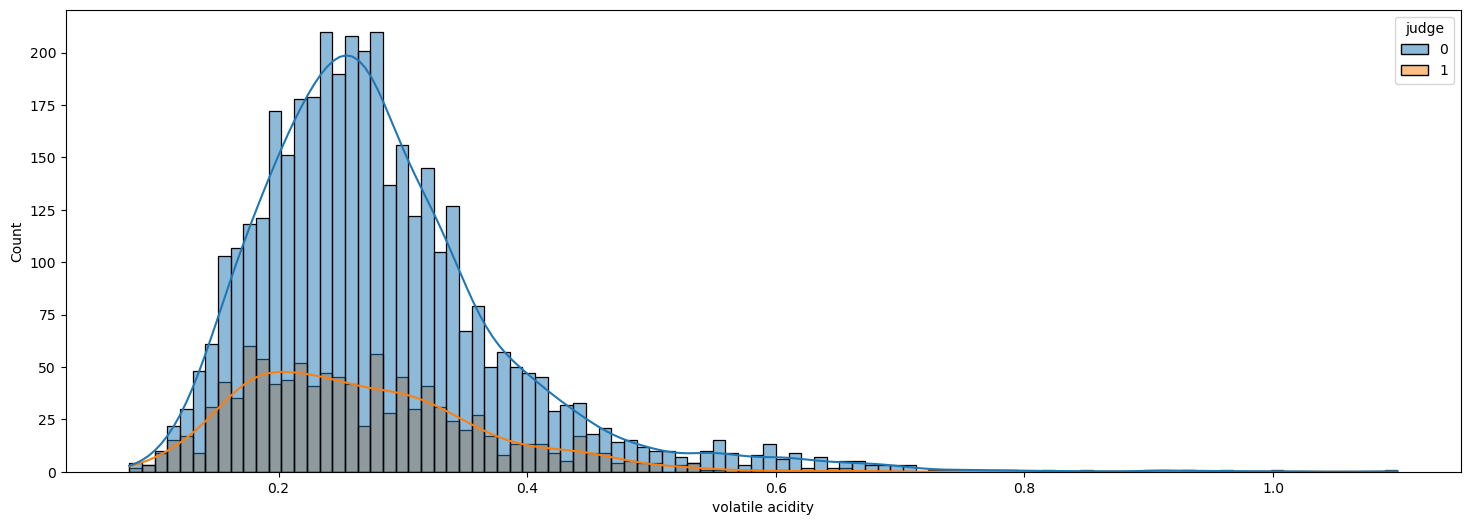

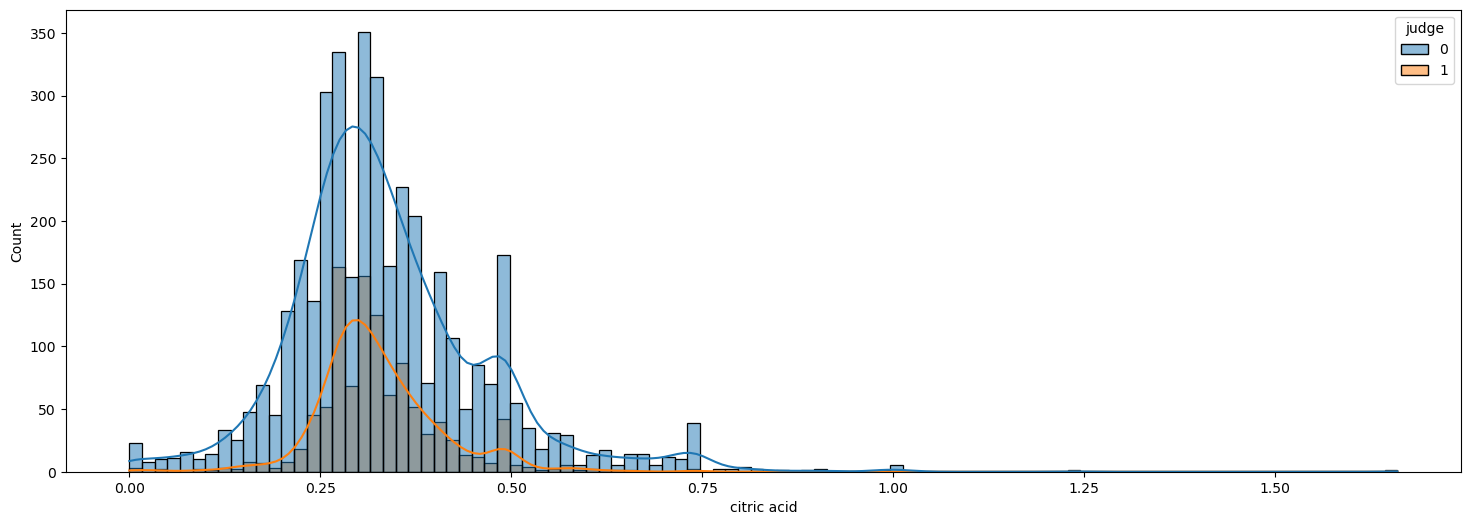

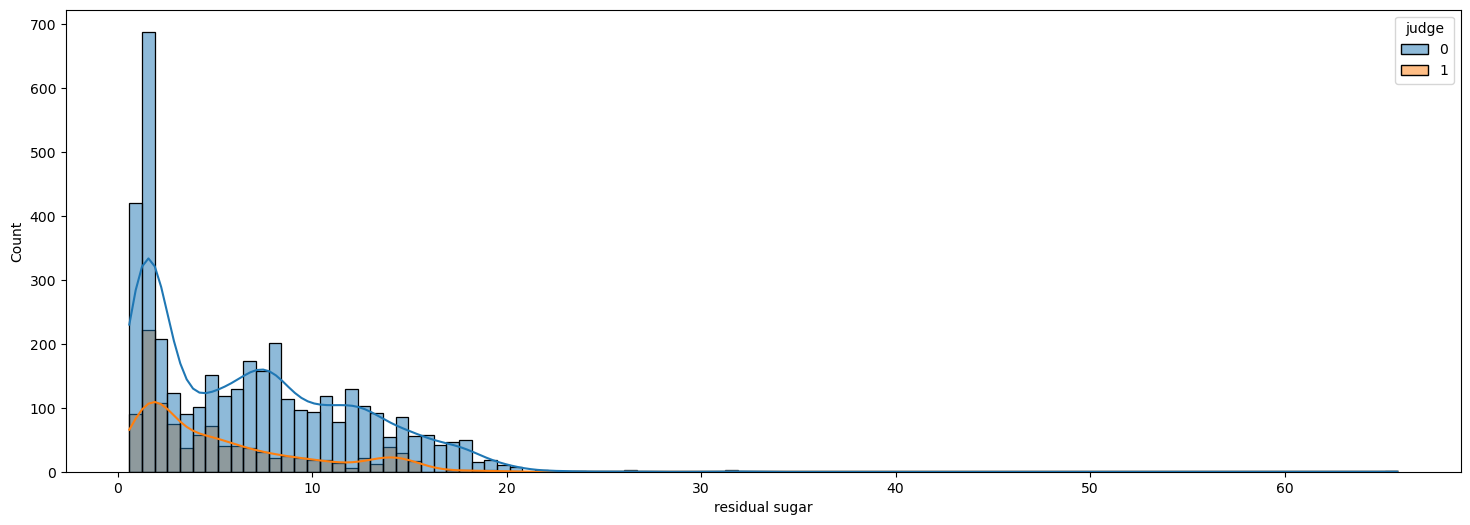

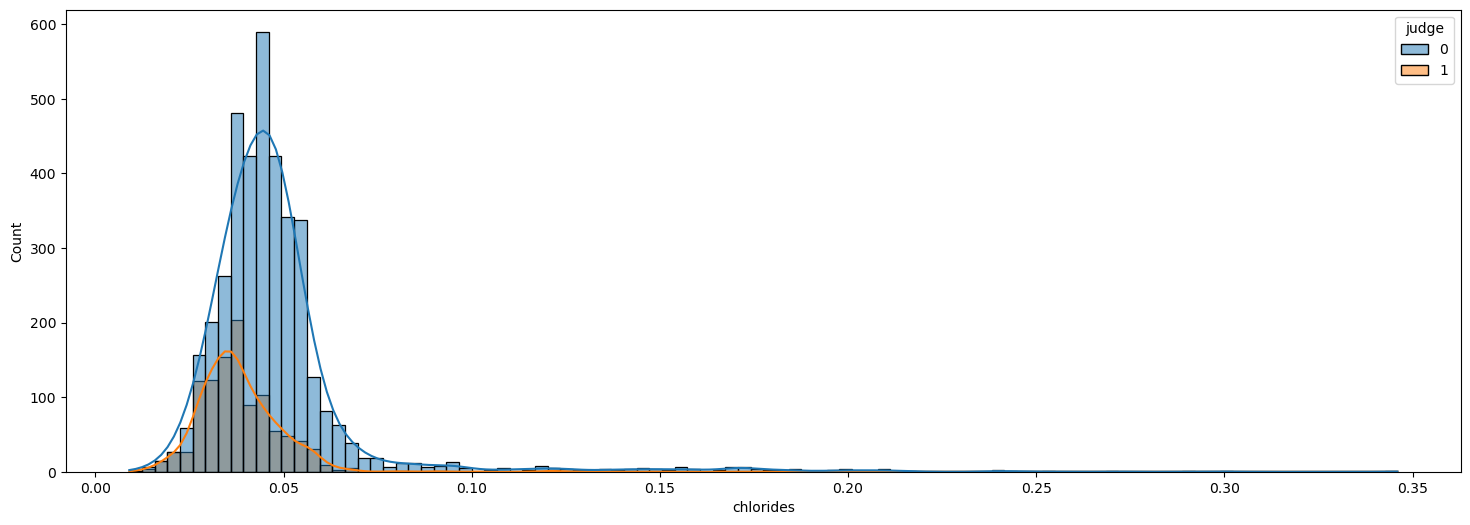

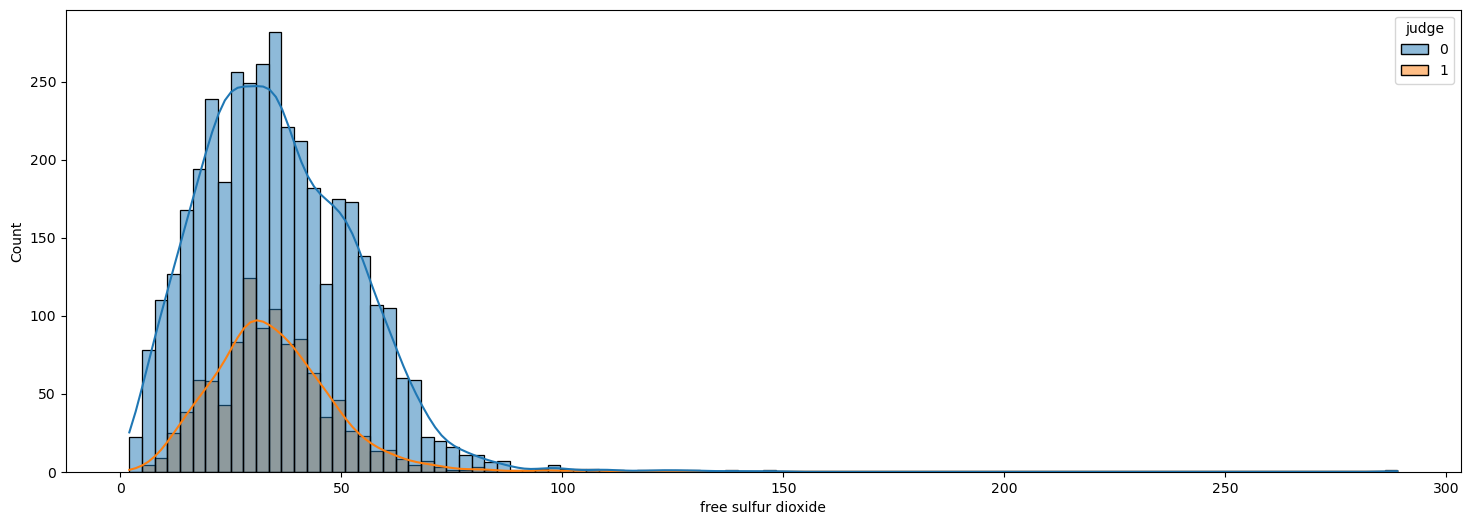

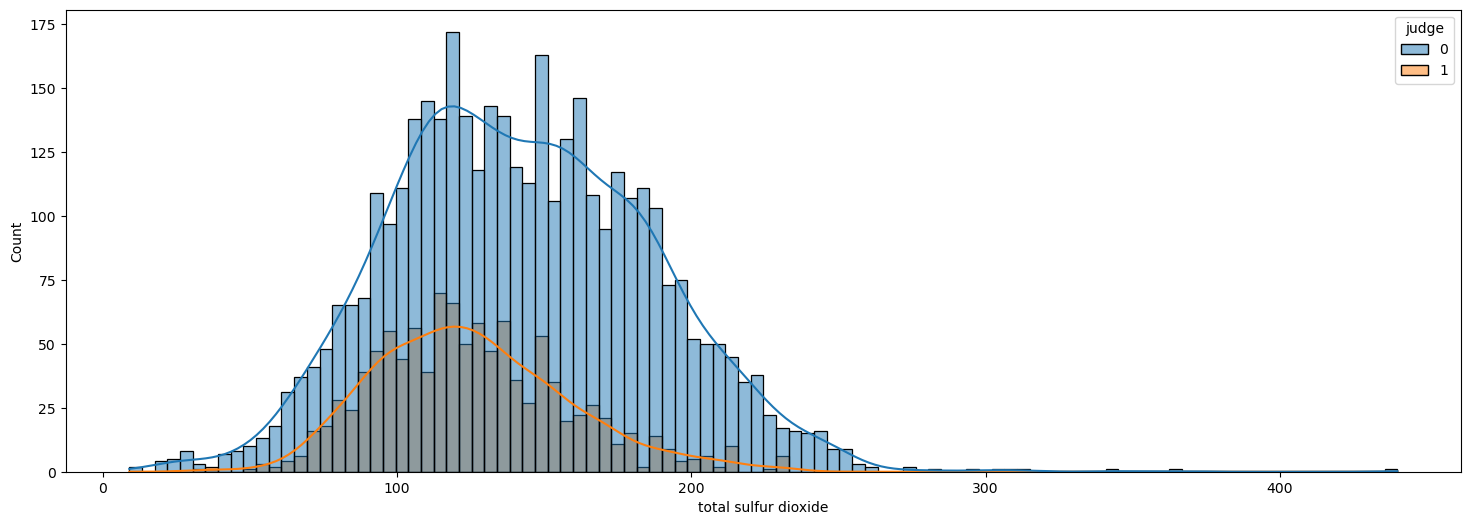

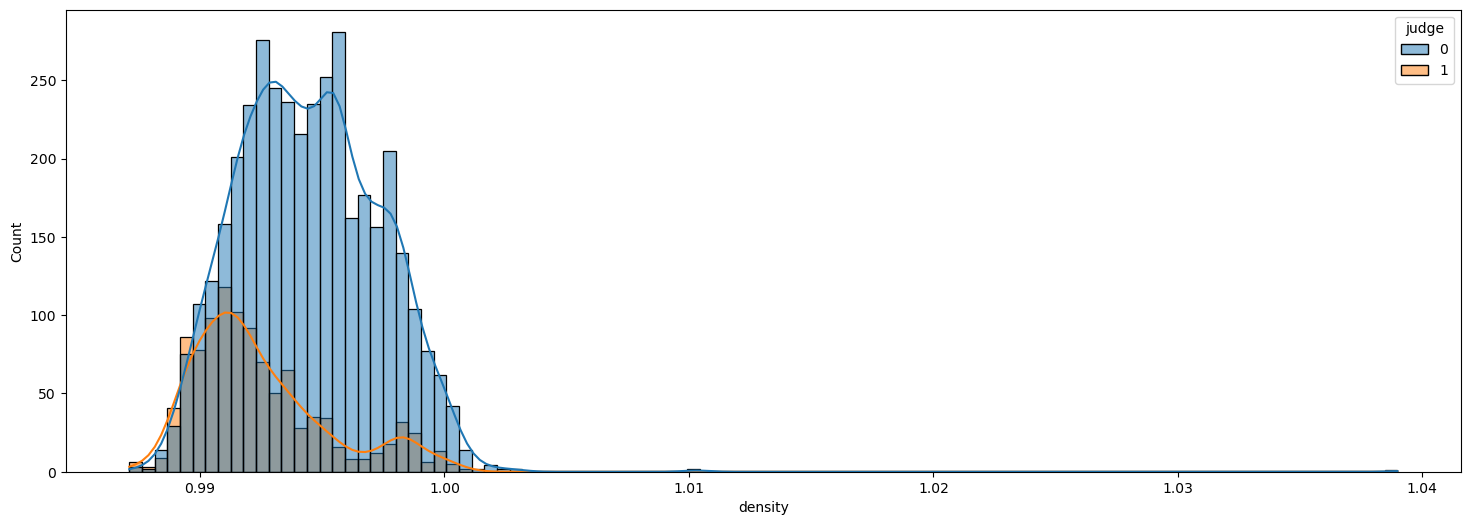

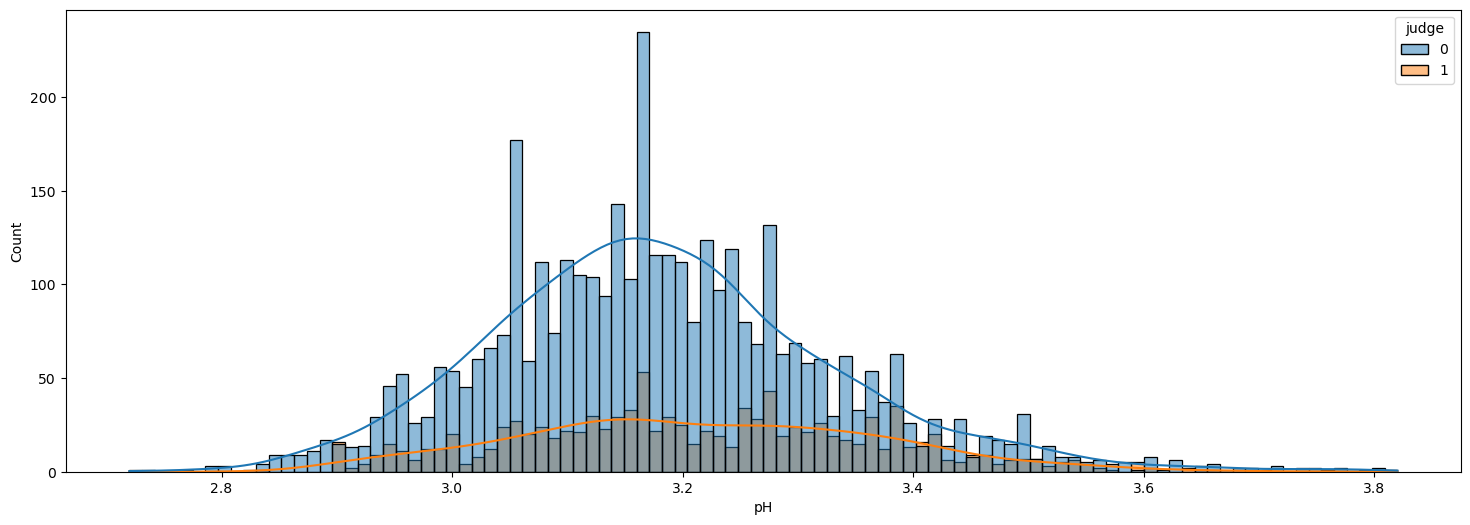

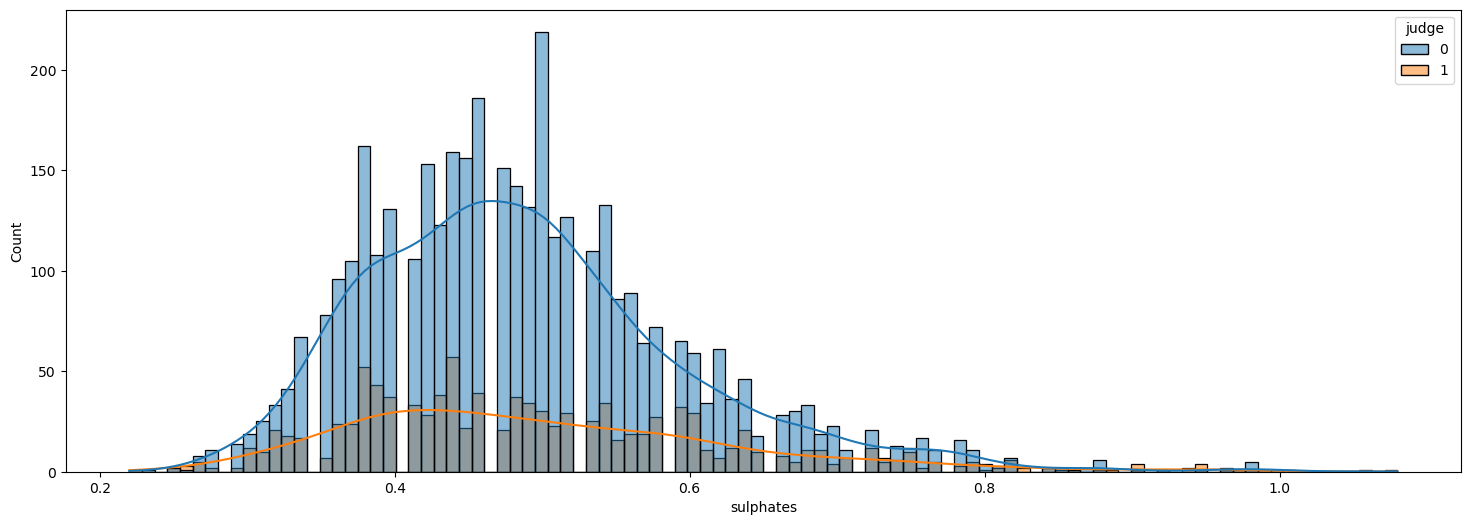

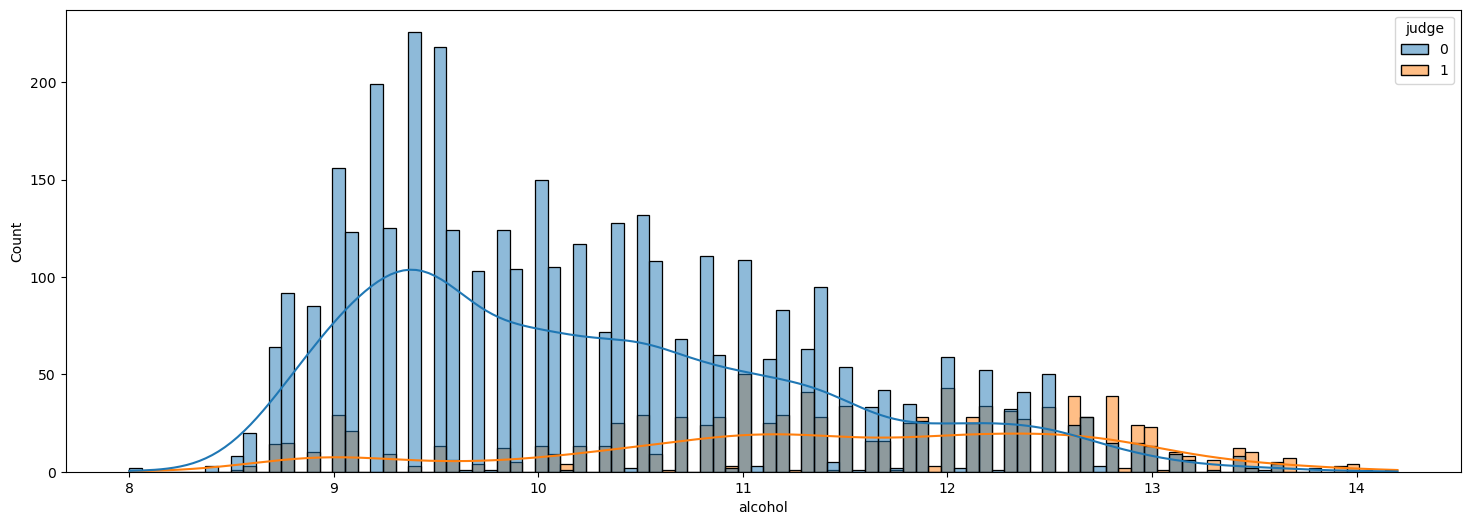

In [7]:
con_df=data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','judge']]

for col in con_df:
    if col == 'judge': break
    fig, ax = plt.subplots(figsize=(18,6))
    fig = sns.histplot(data=con_df, x=col, hue='judge', bins=100,kde=True)
    plt.savefig('con_'+col+'.png')
    plt.show()

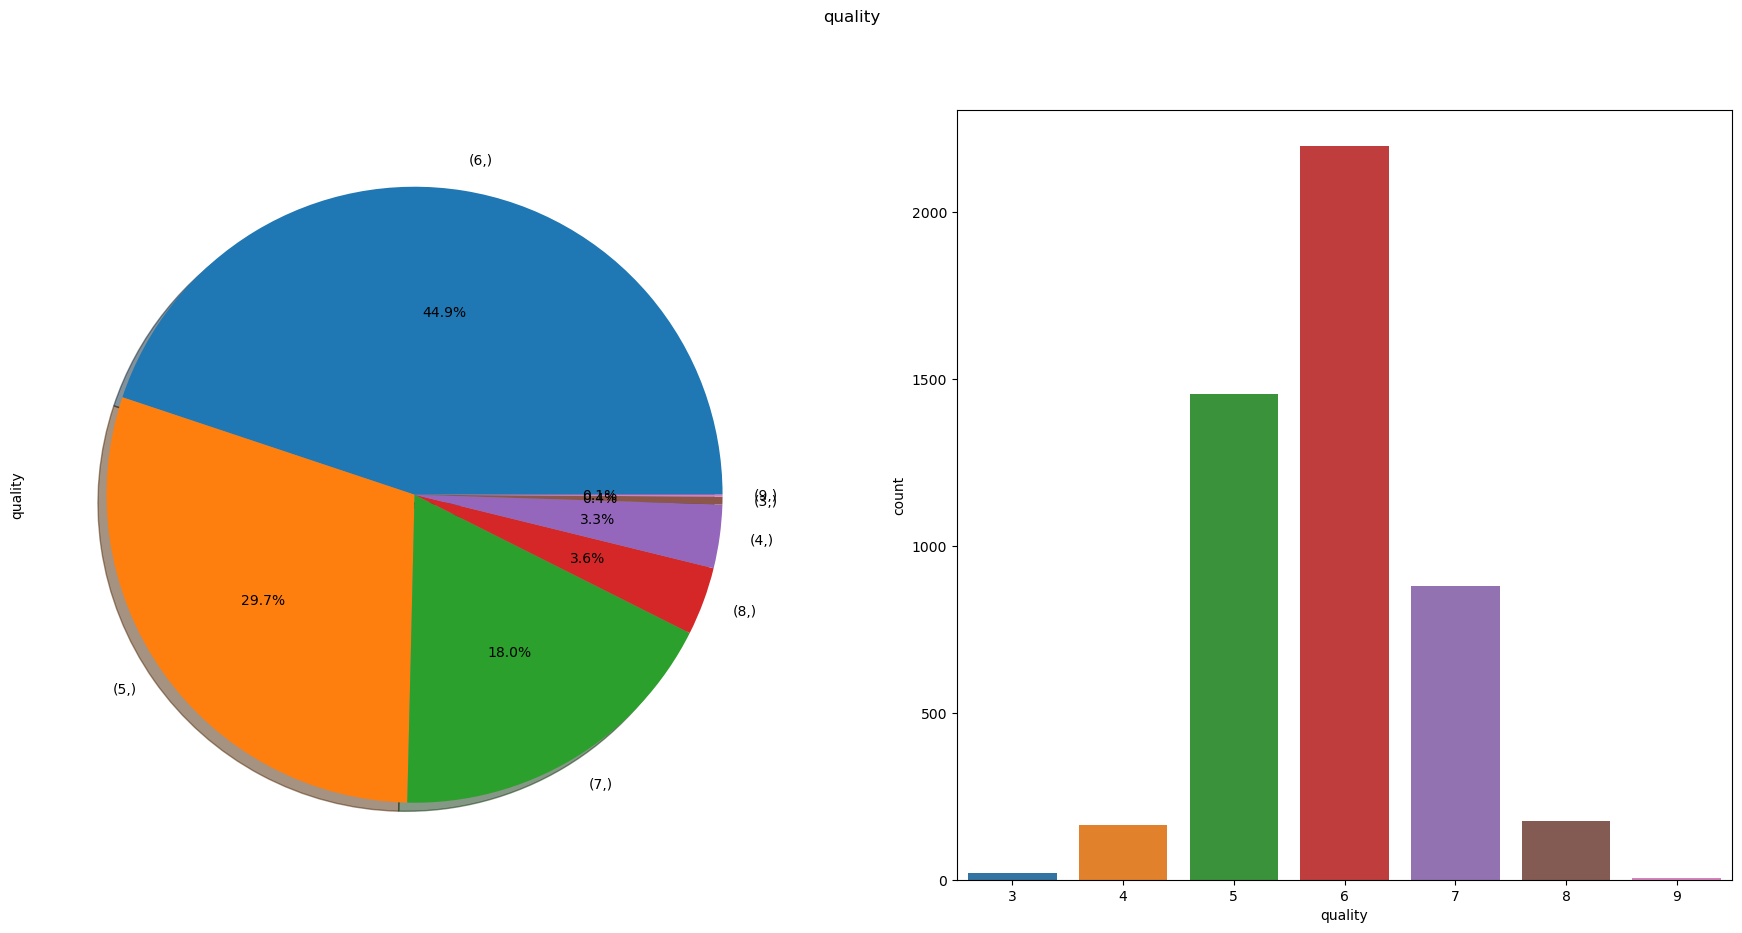

In [8]:
cat_df = data[['quality']]

f, ax = plt.subplots(1,2,figsize=(22,10))
cat_df.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('quality')
sns.countplot(x='quality',data=cat_df,ax=ax[1])
plt.suptitle('quality')
plt.savefig('cat_quality.png')
plt.show()

In [9]:
#assign sample to dataframe for train/test splitting
data["sample"] = np.random.choice(range(len(data)), size=len(data), replace=False)

#training set
tr = data[data["sample"].isin(list(range(0,3999)))].drop(["quality","sample"], axis=1)
x_tr = tr.drop(["judge"], axis=1)
y_tr = tr["judge"]

#validation set
val = data[~data["sample"].isin(list(range(0,3999)))].drop(["quality","sample"], axis=1)
x_val = val.drop(["judge"], axis=1)
y_val = val["judge"]

### 1a. Logistic Regression approach

In [10]:
#Training: fitting with Logistic Regression (LR)
fit_lr = LogisticRegression(penalty='l2', solver="saga", max_iter=1500,  verbose=True).fit(X = x_tr, y = y_tr)

#Prediction with validation data
pred_lr = fit_lr.predict(x_val)

#Prediction result and quality:
pred_prob_lr = fit_lr.predict_proba(x_val)[:,1] # probability on prediction
lr_auc = roc_auc_score(y_val, pred_prob_lr) # area under the curve(auc) -- the ROC curve
cf_mat_lr = confusion_matrix(y_val, pred_lr) # the confusion matrix

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\thp12\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s finished


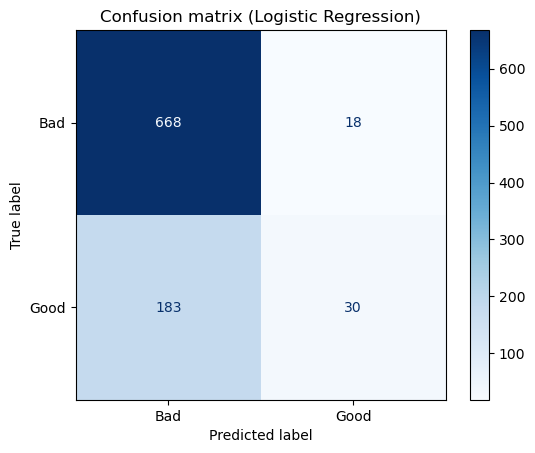

*********************************************************************************

The area under the curve (Logistic Regression) is: 0.7345433143076143
The accuracy of Logistic Regression method is: 0.7764182424916574
The error rate of Logistic Regression method is: 0.22358175750834264


In [11]:
#confusion matrix of LR method

cm_lr = ConfusionMatrixDisplay(confusion_matrix=cf_mat_lr, display_labels=["Bad","Good"],)
cm_lr.plot(cmap="Blues")
plt.title("Confusion matrix (Logistic Regression)")
plt.savefig('cm_lr1.png')
plt.show()
print('*********************************************************************************\n')

# some LR result
print('The area under the curve (Logistic Regression) is:',lr_auc)
print('The accuracy of Logistic Regression method is:', np.trace(cf_mat_lr)/cf_mat_lr.sum())
print('The error rate of Logistic Regression method is:', 1-np.trace(cf_mat_lr)/cf_mat_lr.sum())

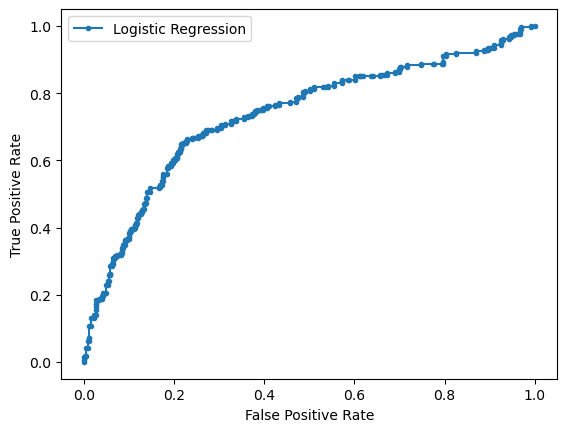

In [12]:
# the roc curve of LR method

lr_fpr, lr_tpr, _ = roc_curve(y_val, pred_prob_lr)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_lr1.png')
plt.show()

### 1b. Random Forest approach

In [13]:
#Training: fitting with Random Forest (RF)
fit_rf = RandomForestClassifier(n_estimators=1500, max_features='sqrt', verbose=1).fit(X = x_tr, y = y_tr)

#Prediction with validation data
pred_rf = fit_rf.predict(x_val)

#Prediction result and quality:
pred_prob_rf = fit_rf.predict_proba(x_val)[:,1]# probability on prediction
rf_auc = roc_auc_score(y_val, pred_prob_rf)# area under the curve(auc) -- the ROC curve
cf_mat_rf = confusion_matrix(y_val, pred_rf)# the confusion matrix

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   17.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.3s finished


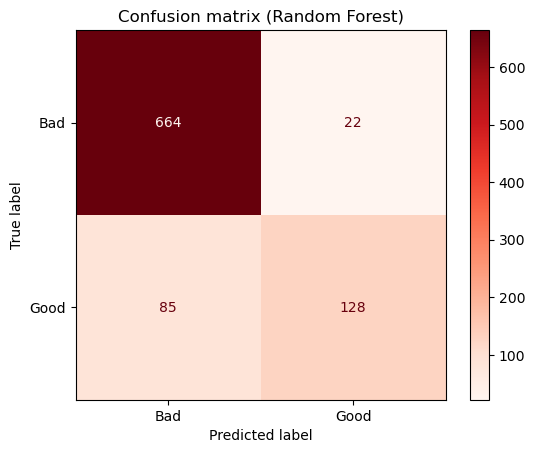

*********************************************************************************

The area under the curve (Random Forest) is: 0.9241777193774896
The accuracy of Logistic Regression method is: 0.8809788654060067
The error rate of Logistic Regression method is: 0.11902113459399333


In [14]:
#confusion matrix of RF method

cm_rf = ConfusionMatrixDisplay(confusion_matrix=cf_mat_rf, display_labels=["Bad","Good"],)
cm_rf.plot(cmap="Reds")
plt.title("Confusion matrix (Random Forest)")
plt.savefig('cm_rf1.png')
plt.show()

print('*********************************************************************************\n')

# some RF result
print('The area under the curve (Random Forest) is:',rf_auc)
print('The accuracy of Logistic Regression method is:', np.trace(cf_mat_rf)/cf_mat_rf.sum())
print('The error rate of Logistic Regression method is:', 1-np.trace(cf_mat_rf)/cf_mat_rf.sum())

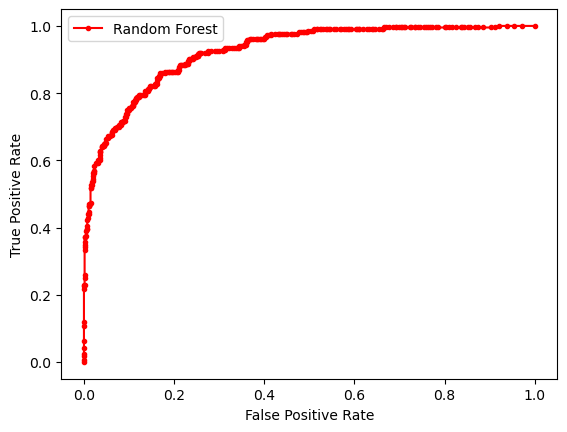

In [15]:
# the roc curve of RF method
rf_fpr, rf_tpr, _ = roc_curve(y_val, pred_prob_rf)
plt.plot(rf_fpr, rf_tpr, marker='.', color='r', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_rf1.png')
plt.show()

### 1c. Support Vector Classifier approach

In [16]:
#Training: fitting with Support Vector Classifier (SVC)
fit_svc = SVC(kernel='rbf', decision_function_shape='ovo', probability=True).fit(x_tr,y_tr)

#Prediction with validation data
pred_svc = fit_svc.predict(x_val)

#Prediction result and quality:
pred_prob_svc = fit_svc.predict_proba(x_val)[:,1]# probability on prediction
svc_auc = roc_auc_score(y_val, pred_prob_svc)# area under the curve(auc) -- the ROC curve
cf_mat_svc = confusion_matrix(y_val, pred_svc)# the confusion matrix

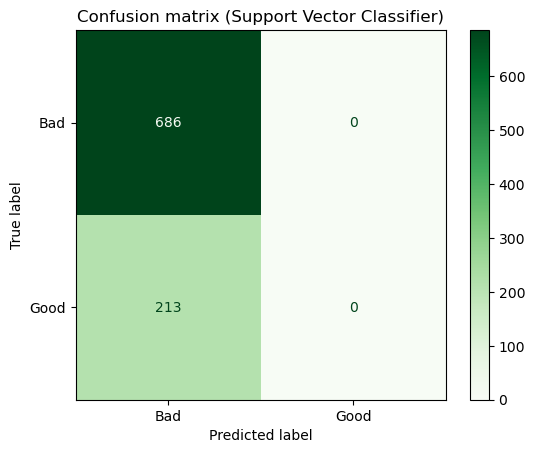

*********************************************************************************

The area under the curve (Support Vector Classifier) is: 0.7898273997727864
The accuracy of SVC method is: 0.7630700778642937
The error rate of SVC method is: 0.2369299221357063


In [17]:
#confusion matrix of SVC method

cm_svc = ConfusionMatrixDisplay(confusion_matrix=cf_mat_svc, display_labels=["Bad","Good"],)
cm_svc.plot(cmap="Greens")
plt.title("Confusion matrix (Support Vector Classifier)")
plt.savefig('cm_svc1.png')
plt.show()
print('*********************************************************************************\n')

# some SVC result
print('The area under the curve (Support Vector Classifier) is:',svc_auc)
print('The accuracy of SVC method is:', np.trace(cf_mat_svc)/cf_mat_svc.sum())
print('The error rate of SVC method is:', 1-np.trace(cf_mat_svc)/cf_mat_svc.sum())

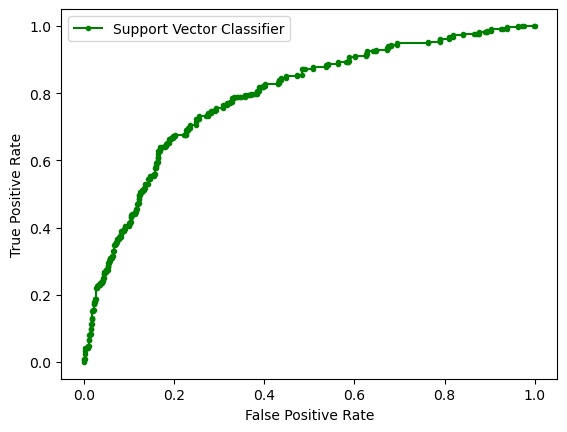

In [18]:
# the roc curve of SVC method
svc_fpr, svc_tpr, _ = roc_curve(y_val, pred_prob_svc)
plt.plot(svc_fpr, svc_tpr, marker='.', color='g', label='Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.savefig('roc_svc1.png')
plt.legend()
plt.show()

### 1d. Combined result

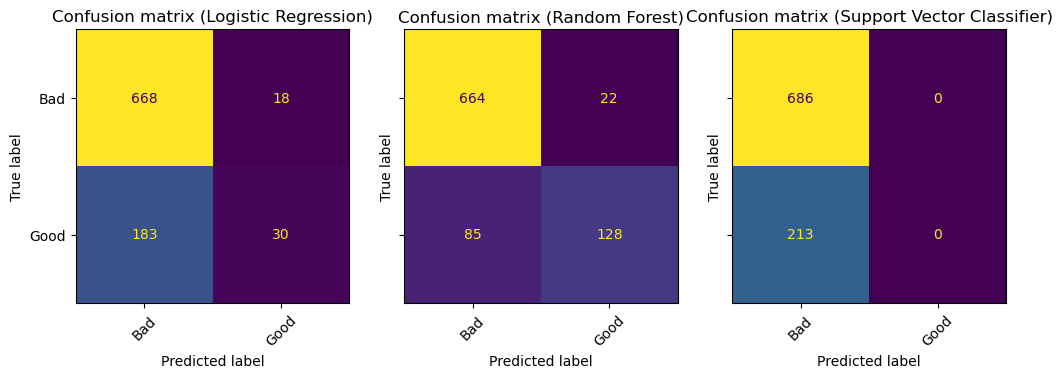

*********************************************************************************

The area under the curve (Logistic Regression) is: 0.7345433143076143
The accuracy: 0.7764182424916574
The error rate: 0.22358175750834264


The area under the curve (Random Forest) is: 0.9241777193774896
The accuracy: 0.8809788654060067
The error rate is: 0.11902113459399333


The area under the curve (Support Vector Classifier) is: 0.7898273997727864
The accuracy: 0.7630700778642937
The error rate is: 0.2369299221357063


In [19]:
# Just comparing the results from different methods
# Print them out side-by-side
f, axes = plt.subplots(1, 3, figsize=(12, 4), sharey='row')
cm_lr.plot(ax=axes[0], xticks_rotation=45)
cm_lr.im_.colorbar.remove()
cm_lr.ax_.set_title("Confusion matrix (Logistic Regression)")
cm_rf.plot(ax=axes[1], xticks_rotation=45)
cm_rf.im_.colorbar.remove()
cm_rf.ax_.set_title("Confusion matrix (Random Forest)")
cm_svc.plot(ax=axes[2], xticks_rotation=45)
cm_svc.im_.colorbar.remove()
cm_svc.ax_.set_title("Confusion matrix (Support Vector Classifier)")
plt.savefig('cm_all1.png')
plt.show()

print('*********************************************************************************\n')

print('The area under the curve (Logistic Regression) is:',lr_auc)
print('The accuracy:', np.trace(cf_mat_lr)/cf_mat_lr.sum())
print('The error rate:', 1-np.trace(cf_mat_lr)/cf_mat_lr.sum())
print('\n')
print('The area under the curve (Random Forest) is:',rf_auc)
print('The accuracy:', np.trace(cf_mat_rf)/cf_mat_rf.sum())
print('The error rate is:', 1-np.trace(cf_mat_rf)/cf_mat_rf.sum())
print('\n')
print('The area under the curve (Support Vector Classifier) is:',svc_auc)
print('The accuracy:', np.trace(cf_mat_svc)/cf_mat_svc.sum())
print('The error rate is:', 1-np.trace(cf_mat_svc)/cf_mat_svc.sum())

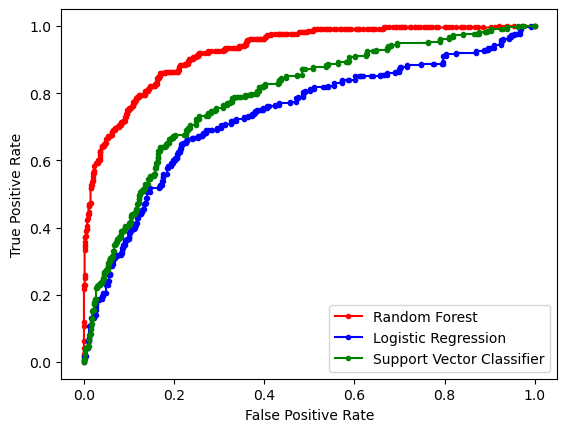

In [20]:
#roc curve for all methods

plt.plot(rf_fpr, rf_tpr, marker='.', color='r', label='Random Forest')
plt.plot(lr_fpr, lr_tpr, marker='.', color='b', label='Logistic Regression')
plt.plot(svc_fpr, svc_tpr, marker='.', color='g', label='Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_all1.png')
plt.show()

# 2. Two adjustable thresholds, multi-class classification

In [21]:
# setting 2 lines for 3 caterogies: bad, normal and good wine

alco_lv1=input("The quality value lower than your entry would become 'bad' wine:")
alco_lv2=input("The quality value higher than your entry would become 'good' wine:")
print("The middle quality would be 'normal' wine. If 'bad' = 'good', this becomes binary classification.")

The quality value lower than your entry would become 'bad' wine: 5
The quality value higher than your entry would become 'good' wine: 6


The middle quality would be 'normal' wine. If 'bad' = 'good', this becomes binary classification.


In [22]:
# load the data up

data2=pd.read_csv("winequality-white.csv", delimiter=";")

# the logic to check if the entries are making sense
if int(alco_lv1) <= min(data2["quality"]) or int(alco_lv2) < min(data2["quality"]):
    print('The entry(s) should be higher or equal to the minimum quality of the data.')
elif int(alco_lv1) > max(data2["quality"]) or int(alco_lv2) >= max(data2["quality"]):
    print('The entry(s) should be lower or equal to the maximum quality of the data.')
elif int(alco_lv1) == int(alco_lv2):
    print('Level values are the same. Please check the first session for binary classification.')
    print('This algorithm would not proceed until correct entries is done.')
elif int(alco_lv1) > int(alco_lv2):
    print("Bad wine should have lower quality than good wine, please change your value.")
    print('This algorithm would not proceed until correct entries is done.')
else:
    alco_lv1 = int(alco_lv1)
    alco_lv2 = int(alco_lv2)

In [23]:
# statistics of the data
data2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [24]:
# assignning the quality classification (response variable: judge) according to the wine quality
judge=[] # judge for good & bad wine, good means quality > line 2 and judge will = 1 for good wine
for row in range(len(data2)):
    if data2['quality'][row] < alco_lv1:
        judge.append(0)
    elif data2['quality'][row] > alco_lv2:
        judge.append(2)
    else:
        judge.append(1)

new_data2 = {'judge': judge}
data2 = data2.assign(**new_data2) # merge judge to the dataframe

### Data Visualization

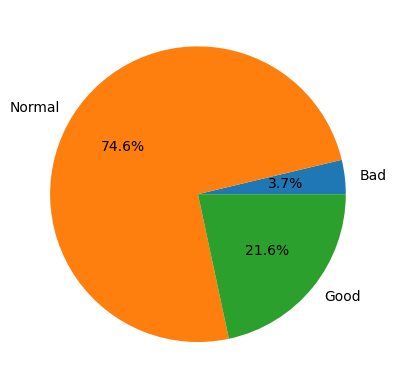

In [26]:
# The continuous and caterogical variables do not change
# Only the response variable: "judge" was affected

ver2_labels = 'Bad','Normal','Good'
ver2 = [data2['judge'].value_counts()[0], data2['judge'].value_counts()[1], data2['judge'].value_counts()[2]]

fig, ax = plt.subplots()
ax.pie(ver2, labels=ver2_labels, autopct='%1.1f%%')
plt.show()

In [27]:
#assign sample to dataframe for train/test splitting
data2["sample"] = np.random.choice(range(len(data2)), size=len(data2), replace=False)

#splitting into trainning and validation set
tr2 = data2[data2["sample"].isin(list(range(0,3999)))].drop(["quality","sample"], axis=1)
x_tr2 = tr2.drop(["judge"], axis=1)
y_tr2 = tr2["judge"]

val2 = data2[~data2["sample"].isin(list(range(0,3999)))].drop(["quality","sample"], axis=1)
x_val2 = val2.drop(["judge"], axis=1)
y_val2 = val2["judge"]

In [28]:
#Training: fitting with Support Vector Classifier (SVC)
fit_svc = SVC(kernel='rbf', decision_function_shape='ovo', probability=True).fit(x_tr,y_tr)

#Prediction with validation data
pred_svc = fit_svc.predict(x_val)

#Prediction result and quality:
pred_prob_svc = fit_svc.predict_proba(x_val)[:,1]# probability on prediction
svc_auc = roc_auc_score(y_val, pred_prob_svc)# area under the curve(auc) -- the ROC curve
cf_mat_svc = confusion_matrix(y_val, pred_svc)# the confusion matrix

In [29]:
#Training: fitting with Logistic Regression and Random Forest
fit_lr2 = LogisticRegression(penalty='l2', solver="saga", max_iter=1500, multi_class="auto", verbose=True).fit(X = x_tr2, y = y_tr2)
fit_rf2 = RandomForestClassifier(n_estimators=1500, max_features='sqrt', verbose=1).fit(X = x_tr2, y = y_tr2)

#Predictions with validation data and the confusion matrics
pred_lr2 = fit_lr2.predict(x_val2)
cf_mat_lr2 = confusion_matrix(y_val2, pred_lr2)
cm_lr2 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_lr2, display_labels=["Bad","Normal","Good"],)

pred_rf2 = fit_rf2.predict(x_val2)
cf_mat_rf2 = confusion_matrix(y_val2, pred_rf2)
cm_rf2 = ConfusionMatrixDisplay(confusion_matrix=cf_mat_rf2, display_labels=["Bad","Normal","Good"],)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


C:\Users\thp12\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:    0.3s finished


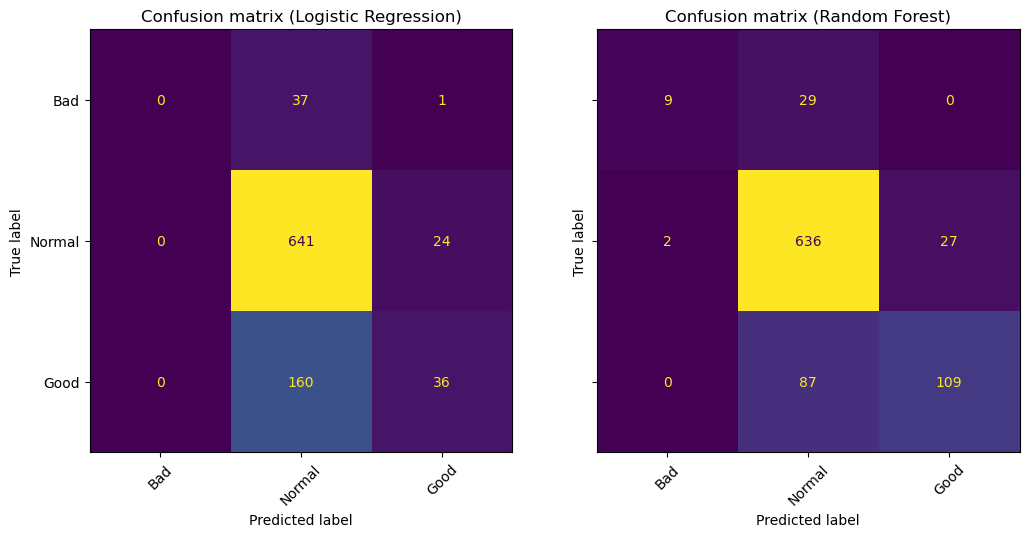

*********************************************************************************

For the Logistic Regression method:
The accuracy: 0.7530589543937709
The error rate: 0.2469410456062291


For the Random Forest method:
The accuracy: 0.8387096774193549
The error rate is: 0.16129032258064513


In [31]:
# display confusion matrics for both methods

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharey='row')
cm_lr2.plot(ax=axes[0], xticks_rotation=45)
cm_lr2.im_.colorbar.remove()
cm_lr2.ax_.set_title("Confusion matrix (Logistic Regression)")
cm_rf2.plot(ax=axes[1], xticks_rotation=45)
cm_rf2.im_.colorbar.remove()
cm_rf2.ax_.set_title("Confusion matrix (Random Forest)")
plt.savefig('cm_all2.png')
plt.show()

print('*********************************************************************************\n')

# some LR and RF results
print('For the Logistic Regression method:')
print('The accuracy:', np.trace(cf_mat_lr2)/cf_mat_lr2.sum())
print('The error rate:', 1-np.trace(cf_mat_lr2)/cf_mat_lr2.sum())
print('\n')
print('For the Random Forest method:')
print('The accuracy:', np.trace(cf_mat_rf2)/cf_mat_rf2.sum())
print('The error rate is:', 1-np.trace(cf_mat_rf2)/cf_mat_rf2.sum())